In [0]:
%matplotlib inline

In [0]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

In [0]:
train=pd.read_csv("train.csv")

In [0]:
test=pd.read_csv("test.csv")

In [6]:
b = train[train['bug'] == 1]
nb = train[train['bug'] == 0]

outlier_fraction = len(b)/float(len(nb))
print(outlier_fraction)

print('bug Cases: {}'.format(len(train[train['bug'] == 1])))
print('nb case: {}'.format(len(train[train['bug'] == 0])))

0.17650962176509621
bug Cases: 266
nb case: 1507


In [0]:
testy=test['bug']

In [0]:
testx=test.drop(columns=['bug'])

In [0]:
trainy=train['bug']

In [0]:
trainx=train.drop(columns=['bug'])

In [9]:
trainx.head()

,Unnamed: 0,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,0,6,3,3,0,10,0,0,0,6,...,54,1.000000,0,0.850000,0.555556,1,2,7.833333,3,1.0000
1,1,63,2,3,27,225,793,7,20,42,...,5680,0.896552,6,0.678947,0.152074,2,11,88.698413,6,1.6984
2,2,1,5,0,1,2,0,1,0,1,...,6,0.000000,0,1.000000,1.000000,0,0,5.000000,0,0.0000
3,3,21,4,0,2,25,210,0,2,21,...,120,0.000000,0,0.824561,0.523810,0,0,4.714286,1,0.9524
4,4,25,3,3,13,67,34,3,11,14,...,1120,0.833333,3,0.684932,0.205000,2,22,43.560000,11,2.2800


In [10]:
train.head()

,Unnamed: 0,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,0,6,3,3,0,10,0,0,0,6,...,1.000000,0,0.850000,0.555556,1,2,7.833333,3,1.0000,0
1,1,63,2,3,27,225,793,7,20,42,...,0.896552,6,0.678947,0.152074,2,11,88.698413,6,1.6984,0
2,2,1,5,0,1,2,0,1,0,1,...,0.000000,0,1.000000,1.000000,0,0,5.000000,0,0.0000,1
3,3,21,4,0,2,25,210,0,2,21,...,0.000000,0,0.824561,0.523810,0,0,4.714286,1,0.9524,0
4,4,25,3,3,13,67,34,3,11,14,...,0.833333,3,0.684932,0.205000,2,22,43.560000,11,2.2800,1


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

lr = LogisticRegression()
lr.fit(trainx,trainy)
predlr=lr.predict(testx)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,predlr)
print(matrix)
print(classification_report(testy,predlr))

[[332   0]
 [145   1]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82       332
           1       1.00      0.01      0.01       146

   micro avg       0.70      0.70      0.70       478
   macro avg       0.85      0.50      0.42       478
weighted avg       0.79      0.70      0.57       478



In [0]:
clf=svm.SVC()

In [12]:
clf.fit(trainx,trainy)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
pred=clf.predict(testx)

In [17]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,pred)
print(matrix)

[[332   0]
 [146   0]]


In [19]:
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(trainx,trainy)
pred1=clf1.predict(testx)
pred1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,pred1)
print(matrix)
print(classification_report(testy,pred1))

[[293  39]
 [127  19]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       332
           1       0.33      0.13      0.19       146

   micro avg       0.65      0.65      0.65       478
   macro avg       0.51      0.51      0.48       478
weighted avg       0.58      0.65      0.60       478



In [24]:
!pip install scikit-plot

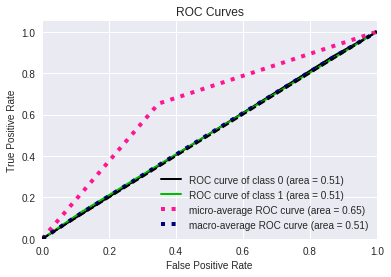

In [27]:
w=clf1.predict_proba(testx)
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = testy
y_probas = w
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

In [29]:
5*5

25

In [0]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(trainx, trainy)
pred2=clf2.predict(testx)

In [37]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,pred2)
print(matrix)
print(classification_report(testy,pred2))

[[314  18]
 [112  34]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       332
           1       0.65      0.23      0.34       146

   micro avg       0.73      0.73      0.73       478
   macro avg       0.70      0.59      0.59       478
weighted avg       0.71      0.73      0.68       478



Special tikering

In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
state = 1

classifiers = {
    "Isolation Forest":IsolationForest(contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction)
   
}

In [35]:
for i, (clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(trainx)
        scores_prediction = clf.negative_outlier_factor_
        y_predtest = clf.fit_predict(testx)
        scores_predictiontest = clf.negative_outlier_factor_
    else:    
        clf.fit(trainx)
        scores_prediction = clf.decision_function(trainx)
        y_pred = clf.predict(trainx)
        clf.fit(testx)
        scores_predictiontest = clf.decision_function(testx)
        y_predtest = clf.predict(testx)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != trainy).sum()
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(trainy,y_pred))
    print("Classification Report :")
    print(classification_report(trainy,y_pred))
    y_predtest[y_predtest == 1] = 0
    y_predtest[y_predtest == -1] = 1
    n_errors = (y_predtest != testy).sum()
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(testy,y_predtest))
    print("Classification Report :")
    print(classification_report(testy,y_predtest))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


Isolation Forest: 383
Accuracy Score :
0.7839819514946419
Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1507
           1       0.31      0.37      0.34       266

   micro avg       0.78      0.78      0.78      1773
   macro avg       0.60      0.61      0.60      1773
weighted avg       0.80      0.78      0.79      1773

Isolation Forest: 141
Accuracy Score :
0.7050209205020921
Classification Report :
              precision    recall  f1-score   support

           0       0.74      0.88      0.81       332
           1       0.53      0.31      0.39       146

   micro avg       0.71      0.71      0.71       478
   macro avg       0.64      0.59      0.60       478
weighted avg       0.68      0.71      0.68       478

Local Outlier Factor: 475
Accuracy Score :
0.7320924985899605
Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.83      0.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [0]:
count_class_0, count_class_1 = train.bug.value_counts()
df_class_0 = train[train['bug'] == 0]
df_class_1 = train[train['bug'] == 1]

Random over-sampling:
1    1507
0    1507
Name: bug, dtype: int64


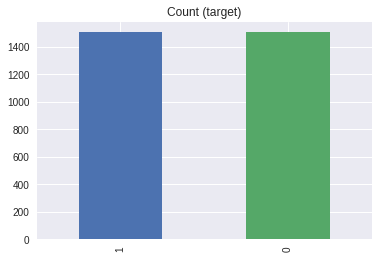

In [42]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.bug.value_counts())

df_test_over.bug.value_counts().plot(kind='bar', title='Count (target)');

In [44]:
df_test_over.head()

,Unnamed: 0,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,0,6,3,3,0,10,0,0,0,6,...,1.000000,0,0.850000,0.555556,1,2,7.833333,3,1.0000,0
1,1,63,2,3,27,225,793,7,20,42,...,0.896552,6,0.678947,0.152074,2,11,88.698413,6,1.6984,0
3,3,21,4,0,2,25,210,0,2,21,...,0.000000,0,0.824561,0.523810,0,0,4.714286,1,0.9524,0
5,5,3,1,0,26,3,3,25,1,3,...,0.000000,0,0.000000,0.666667,0,0,0.000000,1,1.0000,0
7,7,3,4,0,2,14,3,1,2,3,...,0.000000,0,0.979167,0.666667,0,0,19.000000,3,1.6667,0


In [0]:
y=df_test_over['bug']
x=df_test_over.drop(columns=['bug','Unnamed: 0'])

In [47]:
y.head()

0    0
1    0
3    0
5    0
7    0
Name: bug, dtype: int64

In [48]:
x.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,6,3,3,0,10,0,0,0,6,0.00000,54,1.000000,0,0.850000,0.555556,1,2,7.833333,3,1.0000
1,63,2,3,27,225,793,7,20,42,0.87208,5680,0.896552,6,0.678947,0.152074,2,11,88.698413,6,1.6984
3,21,4,0,2,25,210,0,2,21,2.00000,120,0.000000,0,0.824561,0.523810,0,0,4.714286,1,0.9524
5,3,1,0,26,3,3,25,1,3,1.50000,17,0.000000,0,0.000000,0.666667,0,0,0.000000,1,1.0000
7,3,4,0,2,14,3,1,2,3,2.00000,60,0.000000,0,0.979167,0.666667,0,0,19.000000,3,1.6667


In [0]:
clf=svm.SVC()

In [50]:
clf.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
testx=testx.drop(columns=['Unnamed: 0'])

In [0]:
predo=clf.predict(testx)

In [54]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,predo)
print(matrix)
print(classification_report(testy,predo))

[[331   1]
 [146   0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       332
           1       0.00      0.00      0.00       146

   micro avg       0.69      0.69      0.69       478
   macro avg       0.35      0.50      0.41       478
weighted avg       0.48      0.69      0.57       478



In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

lr = LogisticRegression()
lr.fit(x, y)
predlr=lr.predict(testx)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,predlr)
print(matrix)
print(classification_report(testy,predlr))

[[223 109]
 [ 50  96]]
              precision    recall  f1-score   support

           0       0.82      0.67      0.74       332
           1       0.47      0.66      0.55       146

   micro avg       0.67      0.67      0.67       478
   macro avg       0.64      0.66      0.64       478
weighted avg       0.71      0.67      0.68       478



In [0]:
from sklearn.naive_bayes import GaussianNB
clf2 = GaussianNB()
clf2.fit(x, y)
pred2=clf2.predict(testx)

In [56]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,pred2)
print(matrix)
print(classification_report(testy,pred2))

[[308  24]
 [104  42]]
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       332
           1       0.64      0.29      0.40       146

   micro avg       0.73      0.73      0.73       478
   macro avg       0.69      0.61      0.61       478
weighted avg       0.71      0.73      0.70       478



In [0]:
import xgboost as xgb

In [0]:
trainx=trainx.drop(columns=['Unnamed: 0'])


In [67]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(trainx, trainy.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


After OverSampling, the shape of train_X: (3014, 20)
After OverSampling, the shape of train_y: (3014,) 

After OverSampling, counts of label '1': 1507
After OverSampling, counts of label '0': 1507


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    2.5s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:    5.2s finished
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [73]:
clf.best_params_

{'C': 6.0}

In [74]:
lr1 = LogisticRegression(C=6,penalty='l1', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=5, warm_start=False)

In [0]:
predlrsmote=lr1.predict(testx)

In [77]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(testy,predlrsmote)
print(matrix)
print(classification_report(testy,predlrsmote))

[[256  76]
 [ 70  76]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       332
           1       0.50      0.52      0.51       146

   micro avg       0.69      0.69      0.69       478
   macro avg       0.64      0.65      0.64       478
weighted avg       0.70      0.69      0.70       478



In [0]:
def makeOverSamplesADASYN(X,y):
 from imblearn.over_sampling import ADASYN 
 sm = ADASYN()
 X, y = sm.fit_sample(X, y)
 return(X,y)

In [0]:
f=trainx
g=trainy

In [0]:
x_sm, y_sm = makeOverSamplesADASYN(trainx,trainy)

In [66]:
x_sm.head()

AttributeError: ignored